In [1]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Create a dictionary of images
d = {}
train_path = "D:/Faces/train"
for folder in sorted(os.listdir(train_path)): 
    folder_path = os.path.join(train_path, folder)
    d[folder] = []
    for image in os.listdir(folder_path)[:5]:  # Load only the first 5 images for visualization
        image_path = os.path.join(folder_path, image)
        image = np.array(Image.open(image_path))
        d[folder].append(image)



In [3]:
# Function to plot images
def plot_images(d, label): 
    fig, ax = plt.subplots(1, 5, figsize=(10, 2))
    fig.suptitle('Images labelled: {}'.format(label), fontsize=11)
    for col in range(5): 
        ax[col].imshow(d[label][col])
        ax[col].tick_params(axis='both', which='both', bottom=False, left=False, top=False, labelbottom=False, labelleft=False)


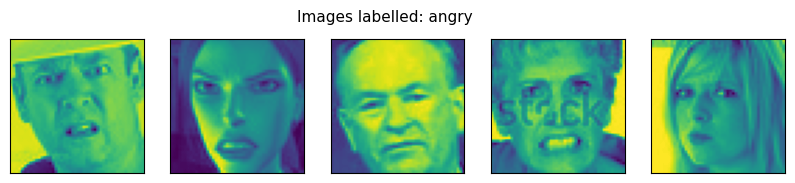

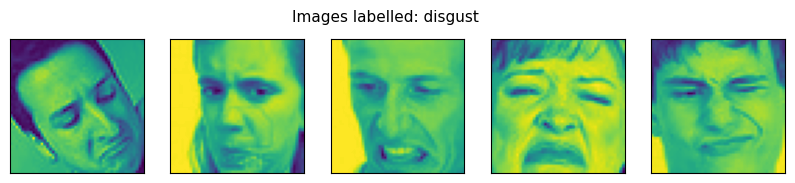

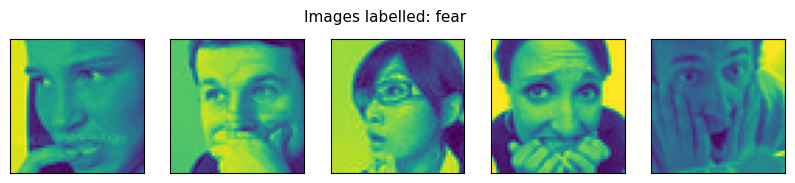

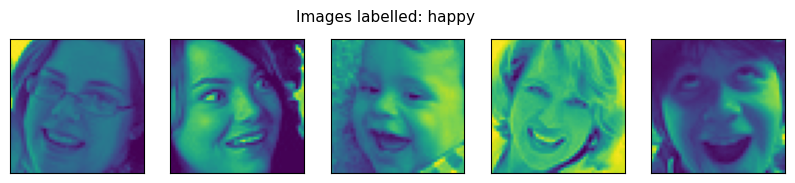

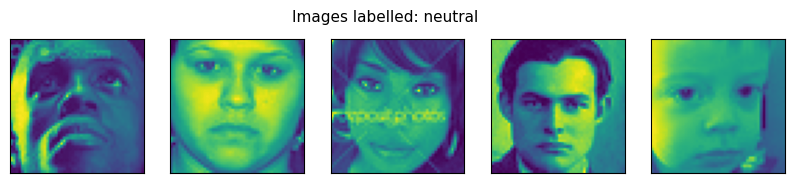

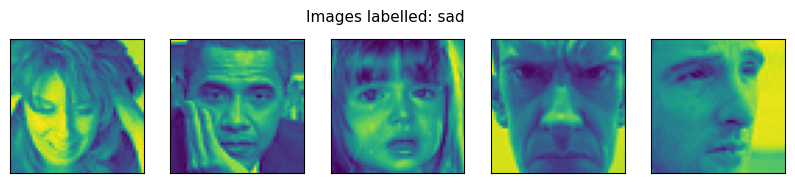

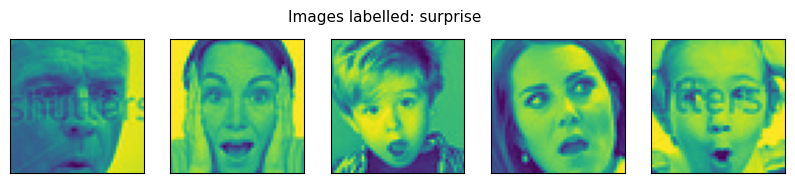

In [4]:
# Plot example images
for key in d.keys():
    plot_images(d, key)

# Data augmentation for training and validation sets
train_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    fill_mode="nearest"
)
val_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input
)



In [5]:
# Loading the training and validation data
train_data = train_aug.flow_from_directory(
    train_path,
    target_size=(48, 48),
    shuffle=True
)

val_data = val_aug.flow_from_directory(
    "D:/Faces/validation",
    target_size=(48, 48),
    shuffle=False  # Don't shuffle validation data
)


Found 24155 images belonging to 7 classes.
Found 6460 images belonging to 7 classes.


In [6]:
# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(48, 48, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
    
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(MaxPool2D(2, 2))
  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for classification
    return model



In [7]:
# Initialize and compile the model
model = create_model()
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

# Train the model
history = model.fit(train_data, epochs=50, validation_data=val_data)


C:\Users\Navindya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,317,959 (16.47 MB)

 Trainable params: 4,315,655 (16.46 MB)

 Non-trainable params: 2,304 (9.00 KB)

C:\Users\Navindya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 887s 1s/step - accuracy: 0.2633 - loss: 1.8795 - val_accuracy: 0.3370 - val_loss: 1.7087
Epoch 2/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 751s 994ms/step - accuracy: 0.3656 - loss: 1.6103 - val_accuracy: 0.3356 - val_loss: 1.7231
Epoch 3/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 752s 996ms/step - accuracy: 0.4272 - loss: 1.4879 - val_accuracy: 0.4446 - val_loss: 1.5092
Epoch 4/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 755s 1s/step - accuracy: 0.4924 - loss: 1.3475 - val_accuracy: 0.5144 - val_loss: 1.2944
Epoch 5/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.5353 - loss: 1.2462 - val_accuracy: 0.5421 - val_loss: 1.2176
Epoch 6/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 542s 718ms/step - accuracy: 0.5640 - loss: 1.1749 - val_accuracy: 0.5364 - val_loss: 1.2826
Epoch 7/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 409s 542ms/step - accuracy: 0.5732 - loss: 1.1413 - val_accuracy: 0.5743 - val_loss: 1.1608
Epoch 8/50
755/755 ━━━━━━━━━━━━━━━━━━━━ 427s 566ms/step - accuracy: 0.5974 - loss: 1.

In [8]:
# Save the model in the HDF5 format
model.save('my_cnn_model.h5')


In [9]:
# Final training accuracy (after the last epoch)
final_train_accuracy = history.history['accuracy'][-1]  # Last training accuracy
final_val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy

# Print the results
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy (Model Accuracy): {final_val_accuracy * 100:.2f}%")


Final Training Accuracy: 77.73%
Final Validation Accuracy (Model Accuracy): 66.44%


In [10]:
# Save the model in the Keras format
model.save('my_cnn_model.keras')  # Saves the entire model


In [11]:
# Evaluate the model on the validation data
val_labels = val_data.classes  # True labels for validation data
predictions = model.predict(val_data)  # Predicted labels for validation data
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax output to class labels

# Calculate accuracy
accuracy = accuracy_score(val_labels, predicted_labels)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


202/202 ━━━━━━━━━━━━━━━━━━━━ 31s 150ms/step
Validation Accuracy: 66.44%


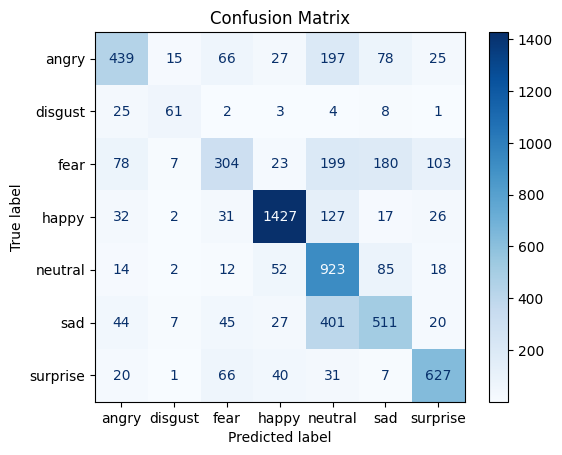

In [12]:
# Confusion Matrix
cm = confusion_matrix(val_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Classification Report
report = classification_report(val_labels, predicted_labels, target_names=val_data.class_indices)
print("Classification Report:\n", report)

# Plotting the training history (Accuracy and Loss curves)
plt.figure(figsize=(12, 4))


Classification Report:
               precision    recall  f1-score   support

       angry       0.67      0.52      0.59       847
     disgust       0.64      0.59      0.61       104
        fear       0.58      0.34      0.43       894
       happy       0.89      0.86      0.88      1662
     neutral       0.49      0.83      0.62      1106
         sad       0.58      0.48      0.53      1055
    surprise       0.76      0.79      0.78       792

    accuracy                           0.66      6460
   macro avg       0.66      0.63      0.63      6460
weighted avg       0.68      0.66      0.66      6460



<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

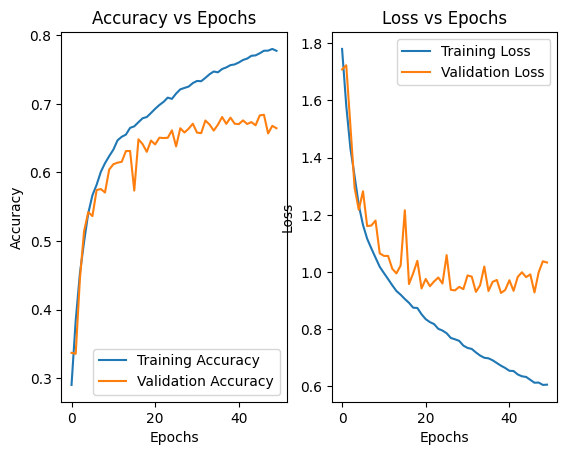

In [14]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step


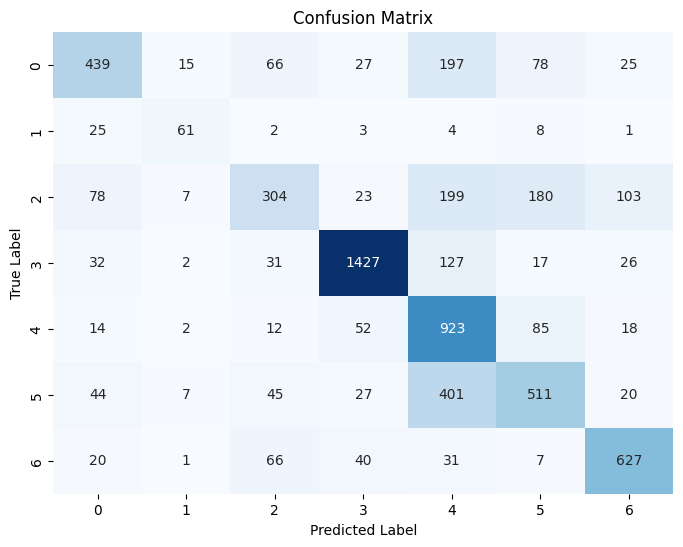

In [15]:
import seaborn as sns
import pandas as pd

# Get predictions on the validation dataset
val_predictions = model.predict(val_data, batch_size=32)
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels
val_true_labels = val_data.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=[str(i) for i in range(conf_matrix.shape[0])],
                               columns=[str(i) for i in range(conf_matrix.shape[1])])

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=conf_matrix_df.columns, yticklabels=conf_matrix_df.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


202/202 ━━━━━━━━━━━━━━━━━━━━ 57s 281ms/step


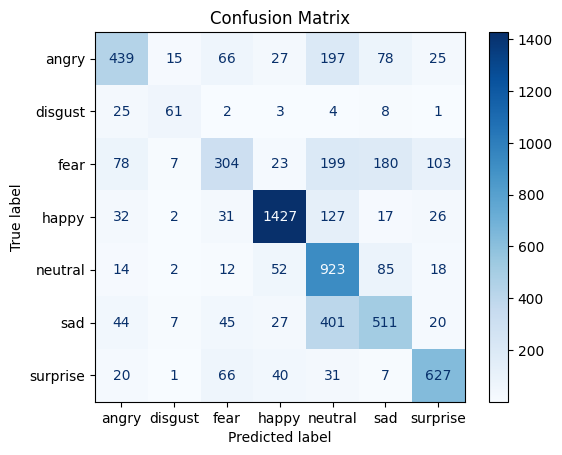

Found 6460 images belonging to 7 classes.


C:\Users\Navindya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step
Validation Accuracy: 66.44%
Precision: 0.68
Recall: 0.66
F1 Score: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.52      0.59       847
           1       0.64      0.59      0.61       104
           2       0.58      0.34      0.43       894
           3       0.89      0.86      0.88      1662
           4       0.49      0.83      0.62      1106
           5       0.58      0.48      0.53      1055
           6       0.76      0.79      0.78       792

    accuracy                           0.66      6460
   macro avg       0.66      0.63      0.63      6460
weighted avg       0.68      0.66      0.66      6460



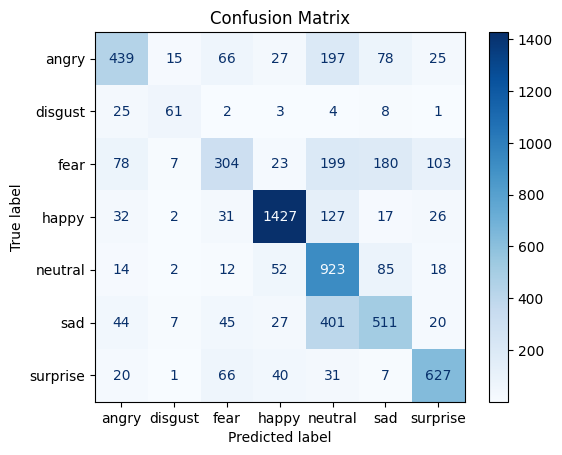

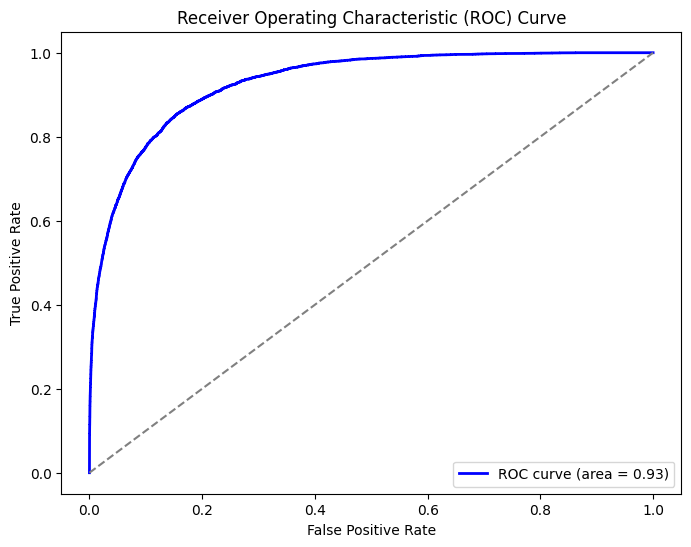

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # Import tensorflow here
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Get predictions on the validation dataset
val_predictions = model.predict(val_data, batch_size=32)
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels
val_true_labels = val_data.classes

# Confusion Matrix
cm = confusion_matrix(val_true_labels, val_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Load the saved model
model = load_model('my_cnn_model.h5')

# OPTIONAL: Recompile the model if needed
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Prepare the validation data (make sure to adjust the validation directory as needed)
val_path = "D:/Faces/validation"

val_aug = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Load the validation data
val_data = val_aug.flow_from_directory(
    val_path,
    target_size=(48, 48),
    shuffle=False
)

# Get predictions on the validation dataset
val_predictions = model.predict(val_data, batch_size=32)
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels
val_true_labels = val_data.classes

# Accuracy
accuracy = accuracy_score(val_true_labels, val_pred_labels)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(val_true_labels, val_pred_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(val_true_labels, val_pred_labels, average='weighted')
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(val_true_labels, val_pred_labels))

# Confusion Matrix
cm = confusion_matrix(val_true_labels, val_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC
# For multi-class classification, we compute ROC AUC for each class
# Convert true labels to one-hot encoding for AUC calculation
y_true = label_binarize(val_true_labels, classes=np.arange(len(val_data.class_indices)))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true.ravel(), val_predictions.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [3]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
model = load_model('my_cnn_model.h5')

# Example: Load test data (adjust for your dataset and data pipeline)
# If your test data is in .npy format (NumPy arrays)
X_test = np.load('X_test.npy')  # Replace with your actual test data file
y_test = np.load('y_test.npy')  # Replace with your actual labels file

# OR, if your data is in CSV format (adjust accordingly)
# import pandas as pd
# data = pd.read_csv('test_data.csv')
# X_test = data.drop(columns=['target_column']).values  # Features
# y_test = data['target_column'].values  # Labels

# Ensure your data is preprocessed correctly:
# For example, normalization or reshaping based on your model's requirements
# X_test = X_test / 255.0  # Normalize if the model was trained on pixel values between 0 and 1
# X_test = X_test.reshape((-1, 64, 64, 3))  # Reshape if your model expects a certain shape (example: 64x64 RGB images)

# Predictions from the model
predictions = model.predict(X_test)

# Print or process predictions
print(predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'X_test.npy'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import load_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Load the model (replace 'your_model.h5' with your actual model filename)
model = load_model('my_cnn_model.h5')

# Assuming you have your test data in X_test and y_test
# X_test = your_test_features
# y_test = your_test_labels (ensure these are one-hot encoded for multi-class)

# Binarize the labels for ROC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])  # Adjust this for your classes

# Get predictions from the model (probabilities for each class)
y_pred = model.predict(X_test)

# Plot ROC curves for each class (emotion)
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):  # Iterate over each class
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Emotion {i}').plot()

plt.title('ROC Curves for Each Emotion')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


NameError: name 'y_test' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import load_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Load the model (replace 'my_cnn_model.h5' with your actual model filename)
model = load_model('my_cnn_model.h5')

# Assuming you have your test data in X_test and y_test
# Example: If you haven't loaded the test data yet, do so now:
# X_test, y_test = load_your_test_data()  # Replace with actual data loading logic

# Binarize the labels for ROC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])  # Adjust this for your classes

# Get predictions from the model (probabilities for each class)
y_pred = model.predict(X_test)

# Plot ROC curves for each class (emotion)
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):  # Iterate over each class
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Emotion {i}').plot()

plt.title('ROC Curves for Each Emotion')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


NameError: name 'y_test' is not defined